# Assignment 3: Linear regression

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Loading the CSV
Started out with loading in the csv dataset and I dropped the empty cells within the dataframe.



In [2]:
df = pd.read_csv("data Mashable.csv")
df = df.dropna()
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


## Finding correlations 
Next I searched for the best correlation to decide which 5 variables I am going to use further.

In [3]:
# sns.pairplot(df)
# plt.show()

In [4]:
df_find_correlations = df.corr()
df_find_correlations["shares_log"].sort_values(ascending=True)

data_channel_is_world           -0.141932
data_channel_is_entertainment   -0.080967
data_channel_is_bus             -0.033469
weekday_is_wednesday            -0.032125
average_token_length            -0.031730
weekday_is_thursday             -0.030329
weekday_is_tuesday              -0.027738
n_tokens_title                  -0.012247
weekday_is_monday               -0.007843
id                              -0.003900
weekday_is_friday                0.006309
n_tokens_content                 0.032897
data_channel_is_lifestyle        0.036926
num_videos                       0.037147
data_channel_is_tech             0.047729
title_sentiment_polarity         0.050216
global_sentiment_polarity        0.053199
title_subjectivity               0.055161
weekday_is_sunday                0.071864
weekday_is_saturday              0.072644
data_channel_is_socmed           0.085516
num_imgs                         0.085575
global_subjectivity              0.093021
is_weekend                       0

## A new dataframe 
Here I created a new dataframe with the 5 chosen variables. Next I decides what the Y and X variables/values are. 

In [5]:
df_subset = df[["is_weekend", "global_subjectivity", "num_imgs" , "data_channel_is_socmed", "title_subjectivity", "shares_log"]]
df_subset.head()

y = df_subset['shares_log'] 
X = df_subset.loc[:,'is_weekend':'title_subjectivity'] 
X.head()

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,title_subjectivity
0,0,0.439379,12,0,0.666667
1,0,0.300454,6,0,0.000000
2,0,0.575486,0,0,0.000000
3,0,0.327220,2,0,0.000000
4,0,0.507709,18,0,0.000000


## Train and test sets
Here I splited the data 70-30: 70% to train our model and 30% to test our model with data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head()

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,title_subjectivity
20921,1,0.451711,0,0,0.500000
4485,0,0.476976,9,0,0.100000
17755,0,0.488495,1,0,0.000000
4704,0,0.545746,23,0,0.454545
13493,0,0.507042,13,0,0.750000


In [7]:
X_test.head()

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,title_subjectivity
15754,1,0.508973,0,0,0.70000
19390,0,0.493311,1,0,0.75000
1603,1,0.425864,6,0,0.49596
21118,0,0.535515,19,0,0.00000
654,0,0.528989,1,0,0.29596


## Identifying the coeffeicient the residual and intercept
Next, I tried to identify the Coefficient and Residual of the model.

In [8]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [9]:
coef = pd.DataFrame(X.columns, lm.coef_)
coef

,0
0.126623,is_weekend
0.282149,global_subjectivity
0.003609,num_imgs
0.135758,data_channel_is_socmed
0.039614,title_subjectivity


In [19]:
b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0]

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X")


The regression line is equal to y = 3.074 + 0.127X


Based on the coefficient, intercept and the residual I came up following analysis:

Intercept is 3.07;
Weekend days add 0.13 to the log shares;
Global subjectivity adds 0.28 to the log shares;
Num img adds 0.003 to the log shares;
Data channel is socmed adds 0.14 to the log shares;
Title subjectivity add 0.04 to the log shares;

With the equasion y = 3.074+0.127X


## Calculating the residual 

In [11]:
y_test_p = lm.predict(X_test)
e = y_test - y_test_p
e

15754    0.184140
19390   -0.132768
1603    -0.083534
21118    0.329370
654      0.600058
           ...   
13958   -0.317828
13372   -0.117407
12459    0.620515
6269    -1.054344
7370    -0.218539
Name: shares_log, Length: 7500, dtype: float64

## Calculating the $ R^2 $ 

Next I started to calculate the $ R^2 $ to see if the model fits.

In [21]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.03549408632649076

## Calculating the RSME

In [12]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.39876061894532666

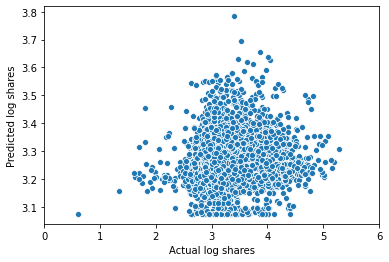

In [13]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual log shares')
plt.ylabel('Predicted log shares')
plt.xlim([0,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
#plt.ylim([3,4])
# plt.plot([0,6], [b0, 4], color='red', lw=1) #Plot a diagonal length
plt.show()

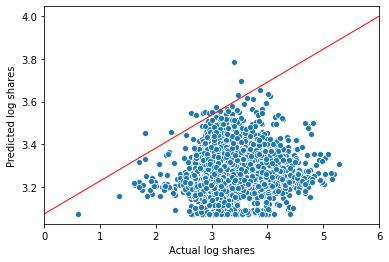

In [22]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual log shares')
plt.ylabel('Predicted log shares')
plt.xlim([0,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.plot([0,6], [b0, 4], color='red', lw=1) #Plot a diagonal length
plt.show()

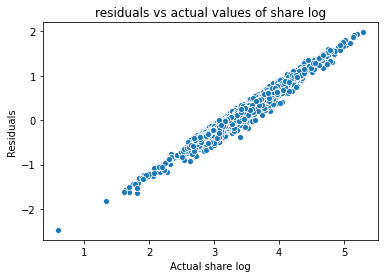

In [15]:
# we can use two methods, plotting using the new df or plotting using y_test and e 
sns.scatterplot(y_test, e)
plt.xlabel('Actual share log')
plt.ylabel('Residuals')
plt.title("residuals vs actual values of share log")
plt.show()